In [1]:
import pandas as pd

df = pd.read_csv('collected_data.csv')

In [2]:
df.head()

,timestamp,position
0,1.658382e+09,500.0
1,1.658382e+09,500.0
2,1.658382e+09,500.0
3,1.658382e+09,500.0
4,1.658382e+09,500.0


In [21]:
df['time_since_start'] = (df['timestamp']-df['timestamp'][0])%1e3
df['position_degree'] = df['position']/1000*240

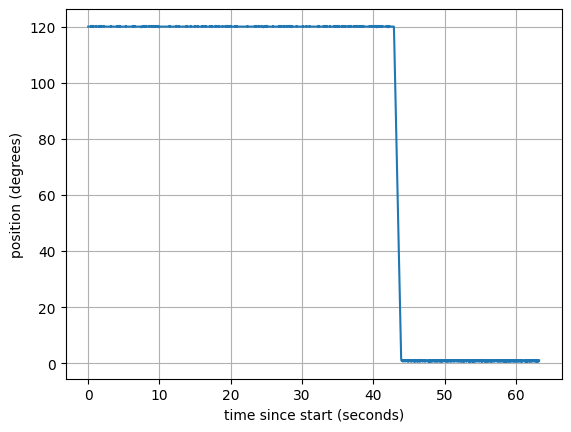

In [23]:
import matplotlib.pyplot as plt

plt.plot(df['time_since_start'], df['position_degree'])
plt.xlabel('time since start (seconds)')
plt.ylabel('position (degrees)')
plt.grid(True)

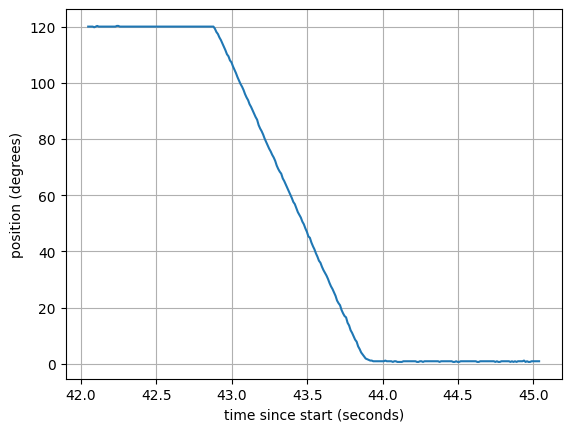

In [25]:
import matplotlib.pyplot as plt

plt.plot(df['time_since_start'][4200:4500], df['position_degree'][4200:4500])
plt.xlabel('time since start (seconds)')
plt.ylabel('position (degrees)')
plt.grid(True)